# Problem 1:

You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics,model_selection

# 1. Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it.

In [4]:
os.chdir('C:\\Users\\ARCHIT GAUTAM\\Desktop\\Machine Learning Project')

In [5]:
df = pd.read_excel('Election_Data.xlsx',sheet_name= "Election_Dataset_Two Classes")

In [6]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [7]:
# First lets drop the unnamed column from the dataset.
df = df.drop('Unnamed: 0',axis =1)

In [8]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [9]:
# checking for null values
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [10]:
# Checking info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [11]:
# Checking for 5 point summary and other stats of data-
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [12]:
# We can check for duplicate rows
dups = df.duplicated().sum()
print('Number of duplicate rows =%d'% (dups))


Number of duplicate rows =8


In [13]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [14]:
dups = df.duplicated().sum()
print('Number of duplicate rows =%d'% (dups))

Number of duplicate rows =0


In [15]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)
        print(df[i].value_counts(normalize=True))
        print('\n')
        

vote
Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64


gender
female    0.53263
male      0.46737
Name: gender, dtype: float64




# 2. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

# Univariate Analysis

Text(0.5, 1.0, 'political.knowledge')

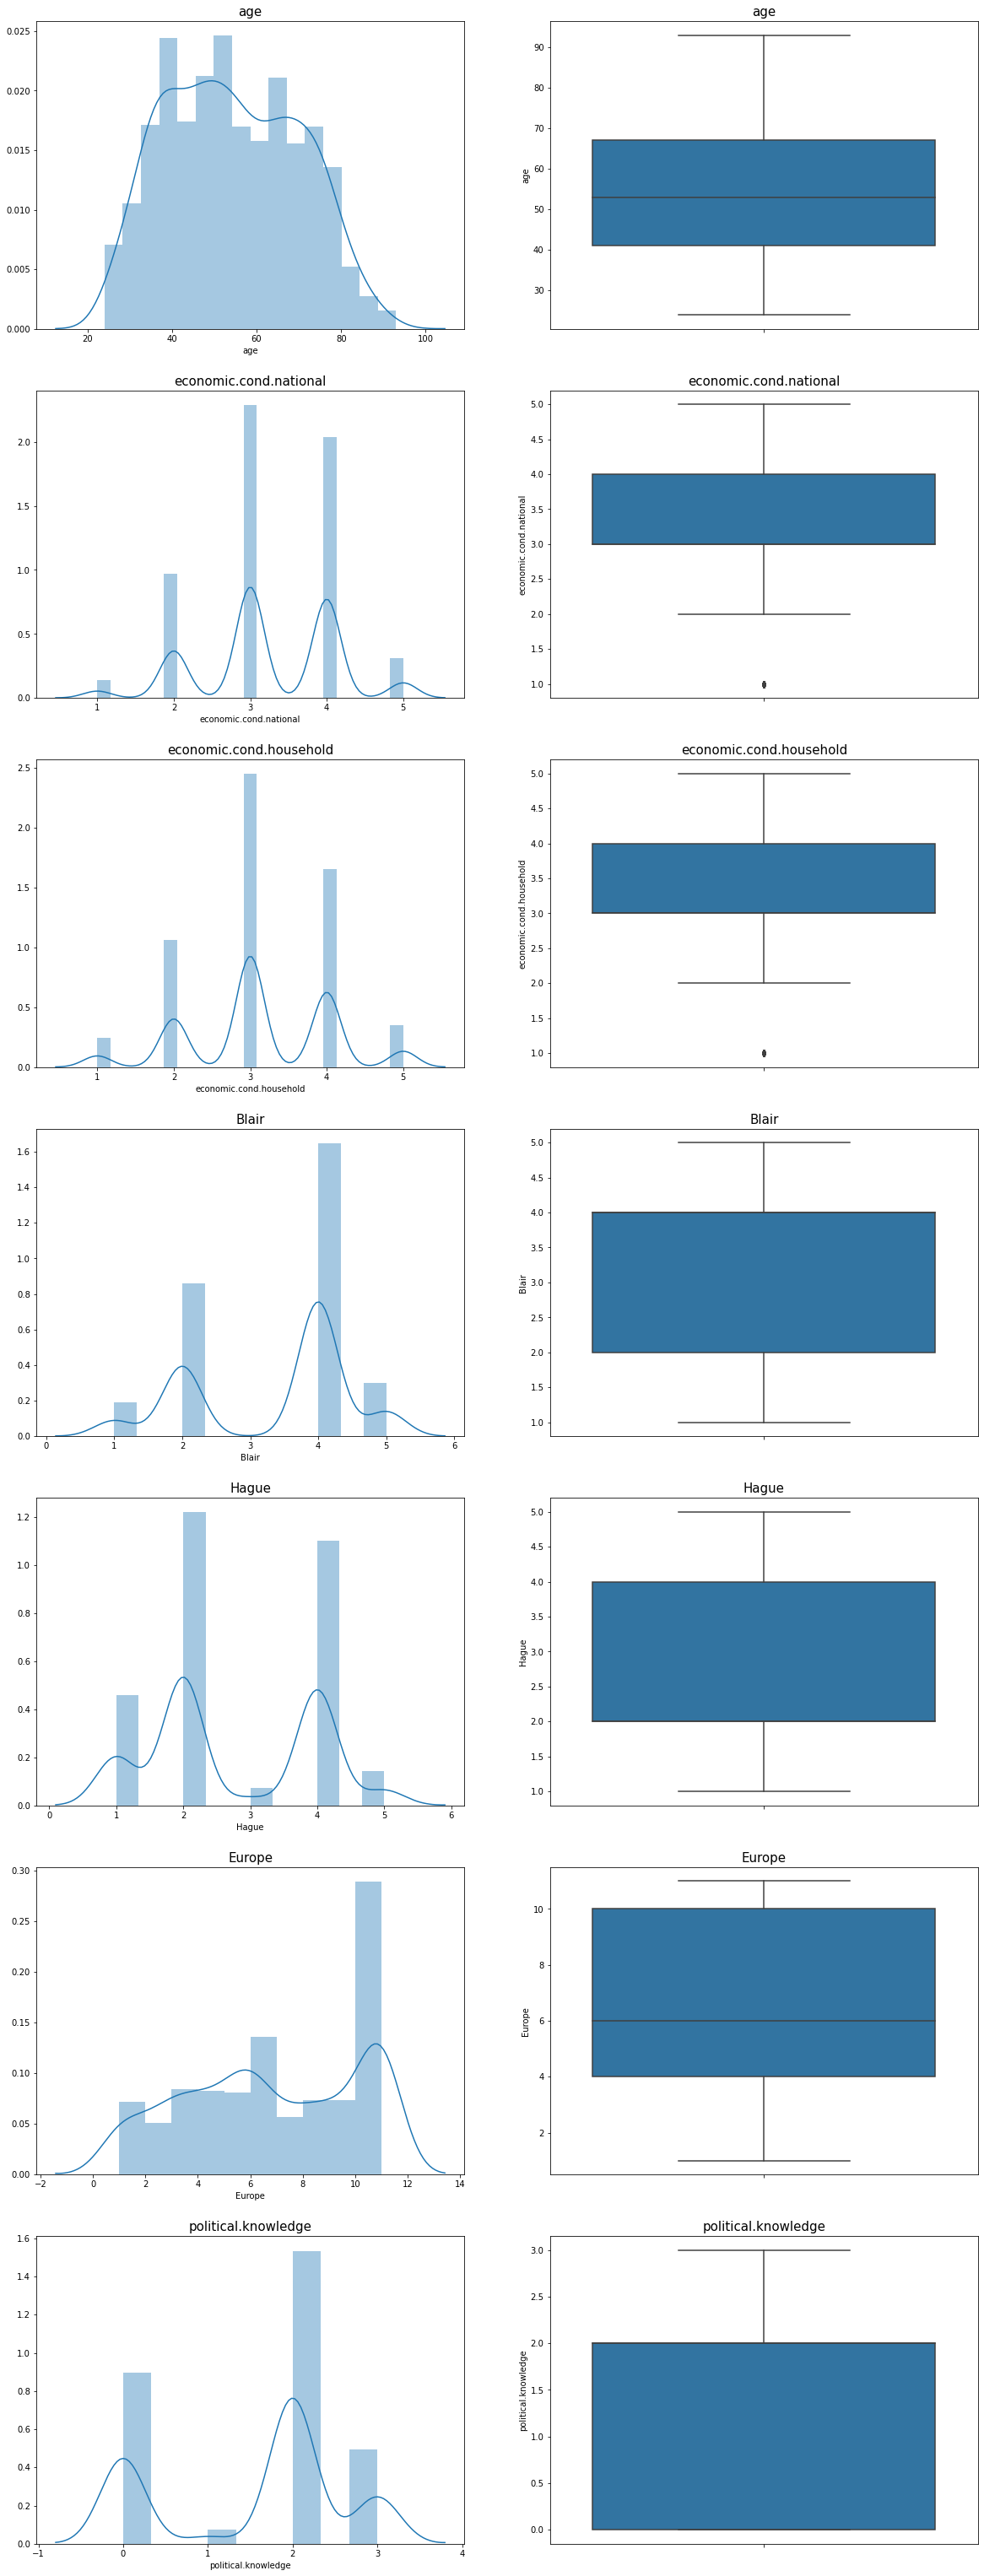

In [16]:
fig ,axes = plt.subplots (nrows = 7 , ncols =2)
fig.set_size_inches(20 , 55)

uplot = sns.distplot(df['age'] ,ax =axes [0][0])
uplot.set_title('age',fontsize =15)
uplot = sns.boxplot(df['age'],ax = axes[0][1] ,orient= 'v' )
uplot.set_title('age',fontsize = 15)

uplot = sns.distplot(df['economic.cond.national'] ,ax =axes [1][0])
uplot.set_title('economic.cond.national',fontsize =15)
uplot = sns.boxplot(df['economic.cond.national'],ax = axes[1][1] , orient= 'v')
uplot.set_title('economic.cond.national',fontsize = 15)

uplot = sns.distplot(df['economic.cond.household'] , ax= axes[2][0])
uplot.set_title('economic.cond.household',fontsize =15)
uplot = sns.boxplot(df['economic.cond.household'], ax = axes[2][1] , orient= 'v' )
uplot.set_title('economic.cond.household',fontsize = 15)

uplot = sns.distplot(df['Blair'] , ax= axes[3][0])
uplot.set_title('Blair',fontsize =15)
uplot = sns.boxplot(df['Blair'], ax = axes[3][1] , orient= 'v' )
uplot.set_title('Blair',fontsize = 15)


uplot = sns.distplot(df['Hague'] , ax= axes[4][0])
uplot.set_title('Hague',fontsize =15)
uplot = sns.boxplot(df['Hague'], ax = axes[4][1] , orient= 'v')
uplot.set_title('Hague',fontsize = 15)

uplot = sns.distplot(df['Europe'] , ax= axes[5][0])
uplot.set_title('Europe',fontsize =15)
uplot = sns.boxplot(df['Europe'], ax = axes[5][1] , orient= 'v')
uplot.set_title('Europe',fontsize = 15)

uplot = sns.distplot(df['political.knowledge'] , ax= axes[6][0])
uplot.set_title('political.knowledge',fontsize =15)
uplot = sns.boxplot(df['political.knowledge'], ax = axes[6][1] , orient= 'v' )
uplot.set_title('political.knowledge',fontsize = 15)

 1. Age , economic.cond.national , economic.cond.household , Haque data is normally distributed.
 2. Blair is not normally distributed and the data is quite right skwed. It shows that Assessment of the Labour leader is more on the higher side i.e greater than 3 on a scale of 1 to 5.
 3. economic.cond.national , economic.cond.household contains few outliers.

# Bivariate Analysis

Text(0.5, 1.0, 'vote')

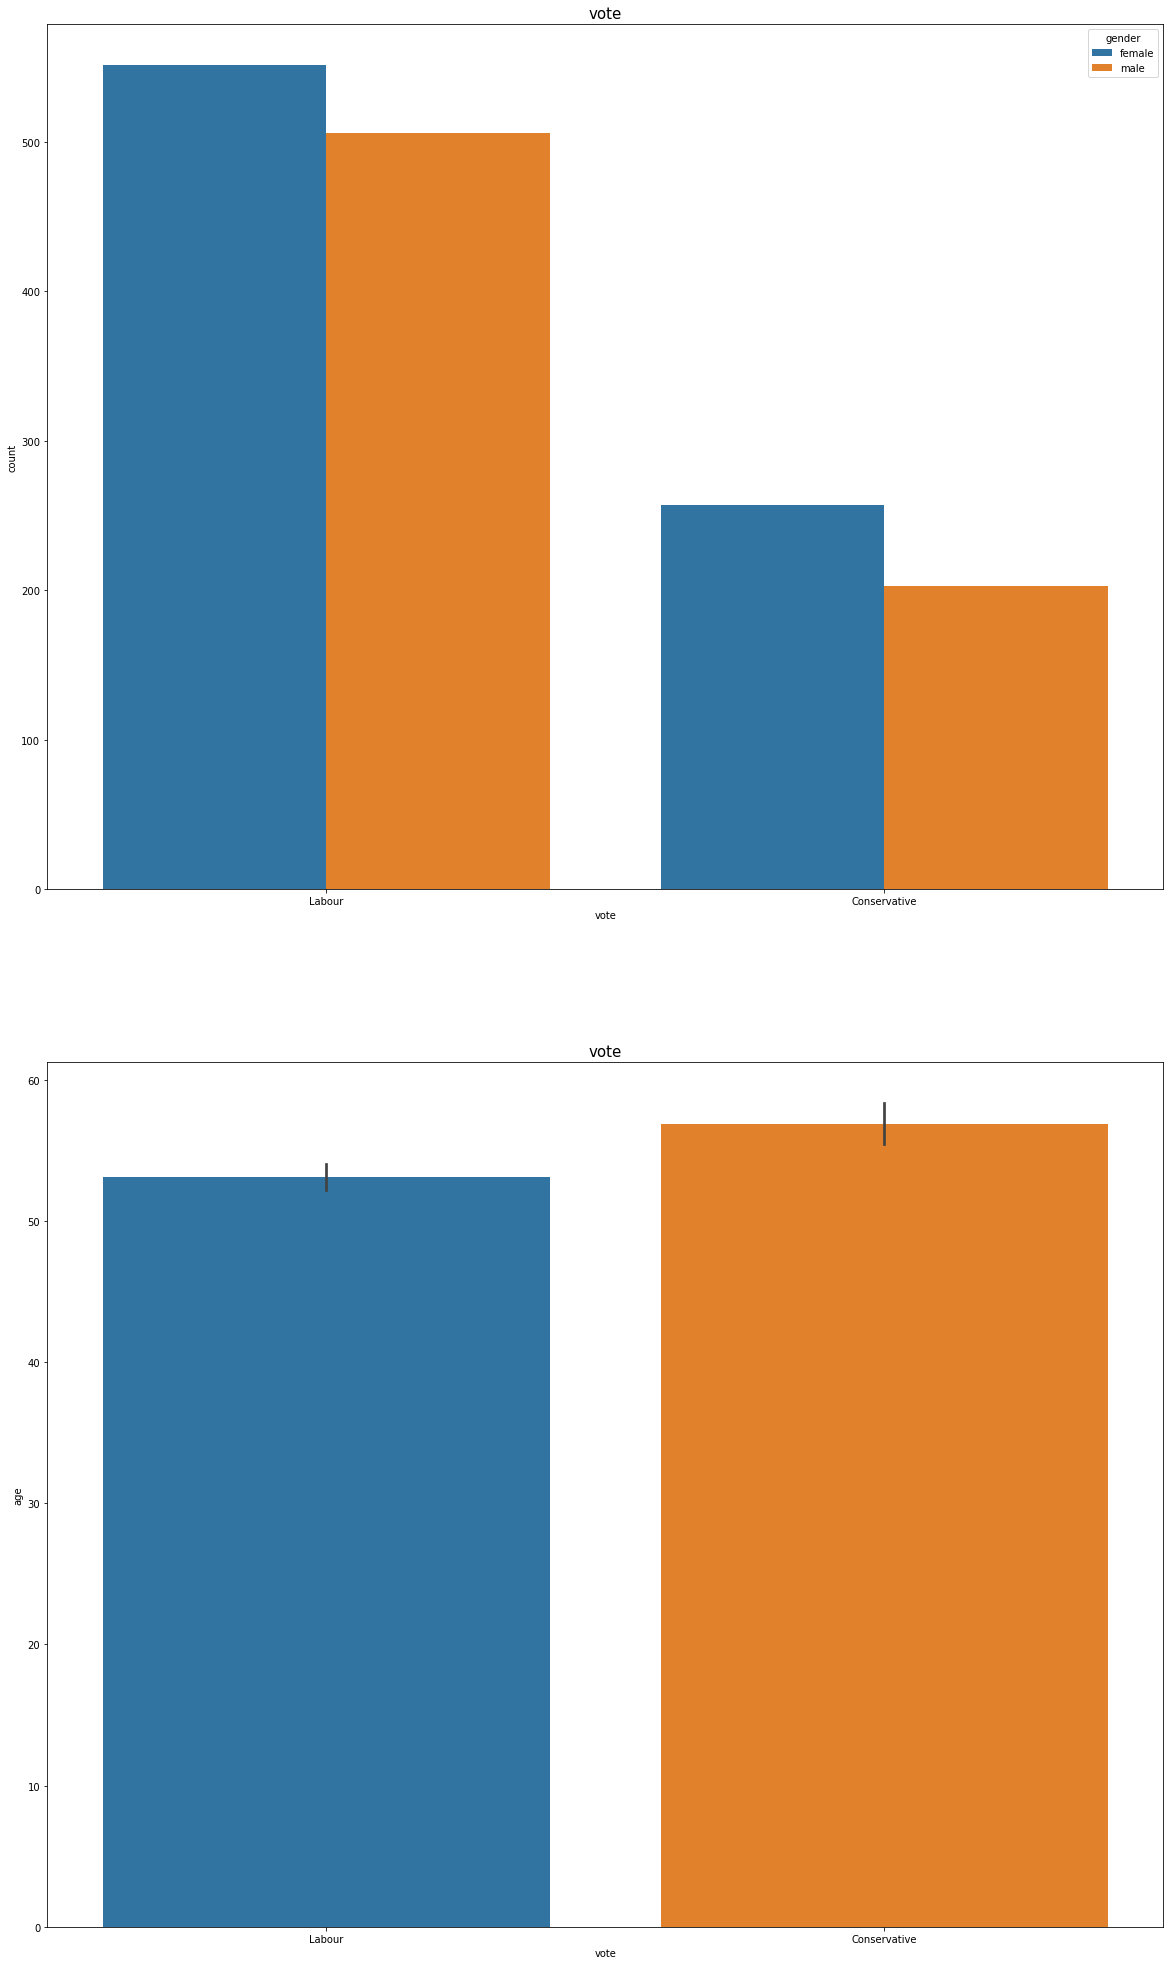

In [17]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(20, 35)

uplot = sns.countplot(x= 'vote' , data = df , hue= 'gender' , ax= axes[0])
uplot.set_title("vote",fontsize=15)

uplot = sns.barplot(x= 'vote' ,y ='age' , data = df , ax= axes[1])
uplot.set_title("vote",fontsize=15)



If we see the target varaibale w.r.t age and gender we can see - 
1. Labour class has more number of Male and female in the gender category as compared to conservative class.
2. We can see that people above 52 or 53 years of age consider conservative class as compared to the labour class.

# Multivariate Analysis

C:\Users\ARCHIT GAUTAM\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\ARCHIT GAUTAM\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


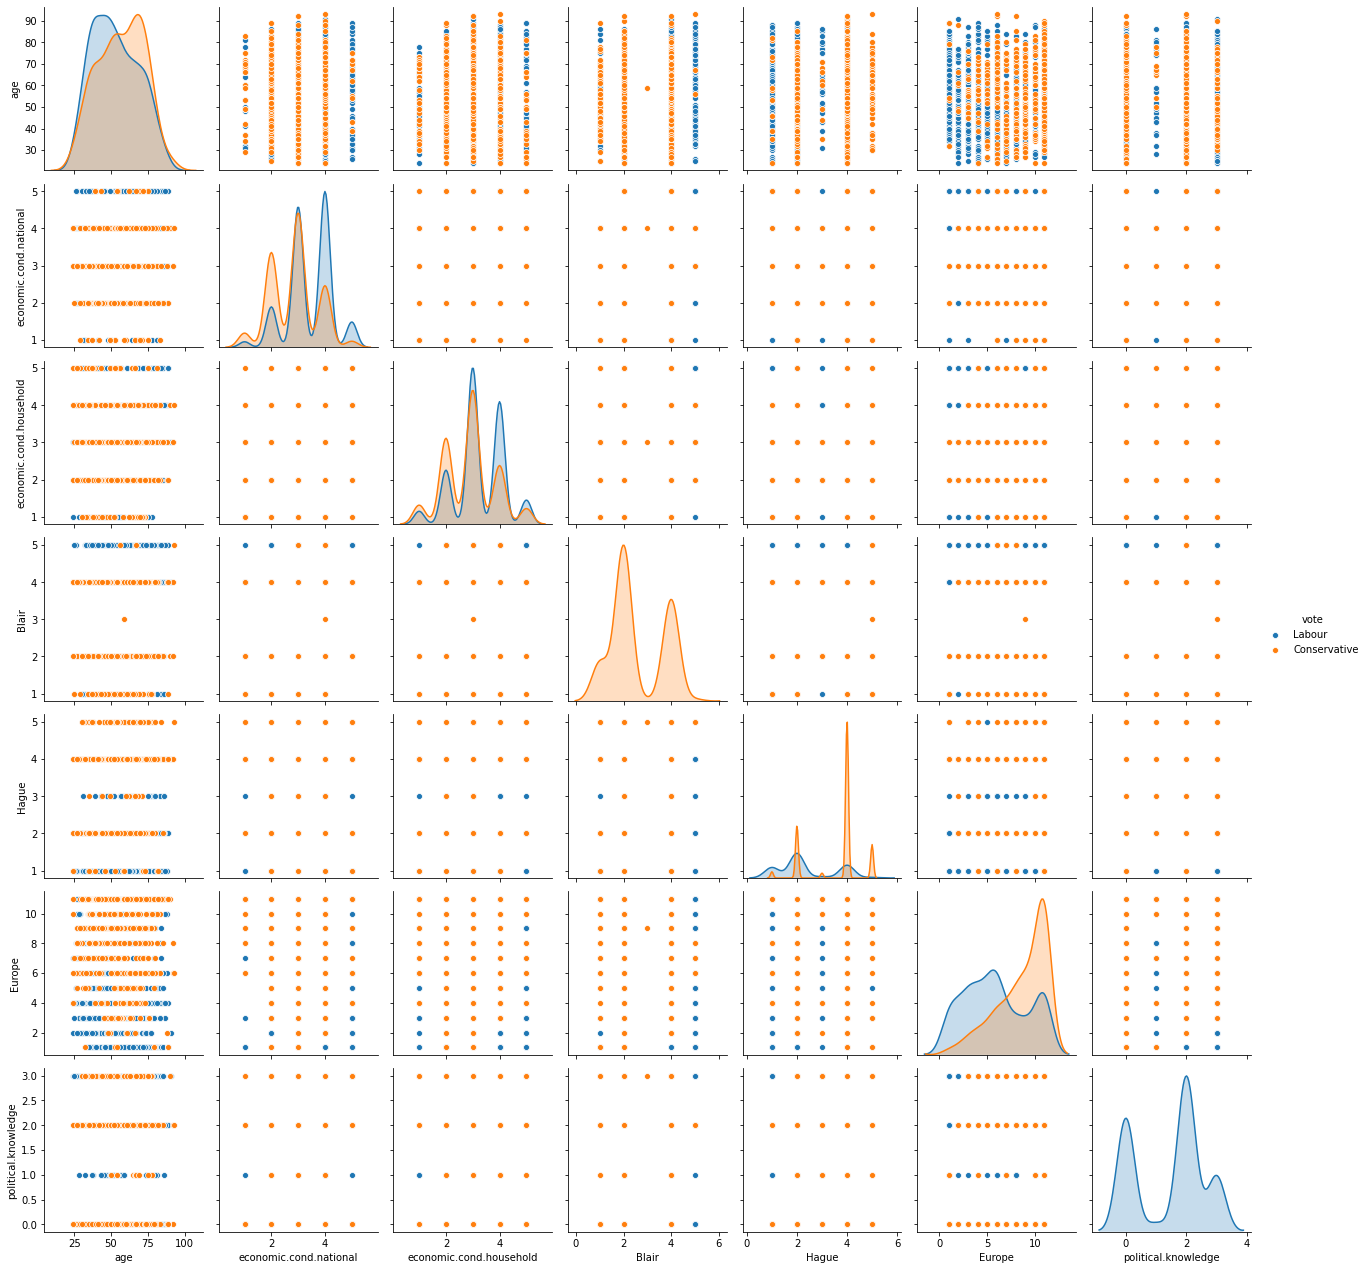

In [18]:
sns.pairplot(df,  hue ='vote')

1.There is some assesment of labour leader as well in Hague variable also.
2.Political knowledge shows that people have knowledge of parties for labur class only.

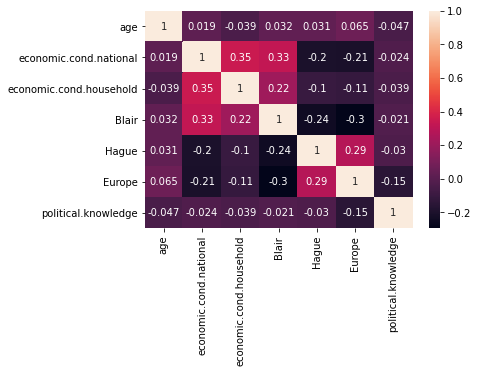

In [19]:
fig.set_size_inches(20, 35)
sns.heatmap(df.corr(),annot=True)
plt.show()

In [20]:
# checking for outliers columnwise-
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 -Q1
outliers = ((df< (Q1 -1.5 * IQR)) | (df >( Q3 + 1.5 * IQR))).sum()
outliers

Blair                       0
Europe                      0
Hague                       0
age                         0
economic.cond.household    65
economic.cond.national     37
gender                      0
political.knowledge         0
vote                        0
dtype: int64

# 3. Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [21]:
#Since Gender is our categorical data. Lets perform one hot encoding for the column gender.
dummy = pd.get_dummies(data = df['gender'],drop_first=True)

In [22]:
df = pd.concat([df , dummy] ,axis = 1 )
 #We have done one hot encoding so now , we can drop the column gender from our dataset
df = df.drop('gender',axis =1)

In [23]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        print('\n')
        print('feature:' , feature)
        print(pd.Categorical(df[feature].unique()))
        print (pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: vote
[Labour, Conservative]
Categories (2, object): [Conservative, Labour]
[1 0]


In [24]:
df['vote'].value_counts(normalize=True)

1    0.69677
0    0.30323
Name: vote, dtype: float64

In [25]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,male
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [26]:
# Separating independent and target variables
X = df.drop('vote', axis=1)

y = df['vote']

In [27]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,male
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [28]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: vote, dtype: int8

In [29]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [30]:
X_train

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,male
991,34,2,4,1,4,11,2,0
1274,40,4,3,4,4,6,0,1
649,61,4,3,4,4,7,2,0
677,47,3,3,4,2,11,0,1
538,44,5,3,4,2,8,0,1
...,...,...,...,...,...,...,...,...
717,52,3,3,4,1,6,2,0
908,43,3,4,2,2,9,2,0
1100,74,4,3,5,4,11,0,0
236,31,3,3,2,3,6,0,0


In [31]:
X_test

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,male
504,71,3,3,2,2,8,2,0
369,43,3,2,4,2,8,3,1
1075,89,5,5,5,2,1,2,1
1031,47,2,3,2,4,8,2,0
1329,33,5,4,4,4,8,0,1
...,...,...,...,...,...,...,...,...
562,37,4,2,4,2,8,1,1
928,42,2,2,1,2,7,2,0
276,88,3,3,4,1,6,0,0
1128,53,4,3,4,2,10,0,0


# Modelling
Apply Logistic Regression and LDA (linear discriminant analysis)

# Building Logistic Regression Model

In [32]:
# Building Logistic Regression Model 
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train , y_train)
lr_y_predict_test = lr_model.predict(X_test)
lr_y_predict_train = lr_model.predict(X_train)
lr_model

C:\Users\ARCHIT GAUTAM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_train.value_counts(normalize= True)

1    0.71065
0    0.28935
Name: vote, dtype: float64

In [34]:
y_test.value_counts(normalize= True)

1    0.664474
0    0.335526
Name: vote, dtype: float64

In [35]:
y_test_predict_prob = lr_model.predict_proba(X_test)
pd.DataFrame(y_test_predict_prob).head()

,0,1
0,0.442175,0.557825
1,0.150329,0.849671
2,0.005636,0.994364
3,0.850840,0.149160
4,0.055634,0.944366


# Model Evaluation

In [36]:
lr_model.score(X_test , y_test)

0.8267543859649122

In [37]:
lr_model.score(X_train , y_train)

0.8341187558906692

# AUC and ROC for the training data for logistic Regression Model

AUC_lr: 0.890


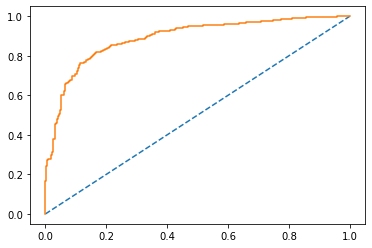

In [38]:
# predict probabilities
probs = lr_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_lr = roc_auc_score(y_train, probs)
print('AUC_lr: %.3f' % auc_lr)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# AUC and ROC for the test data for logistic Regression Model

AUC_test_lr: 0.878


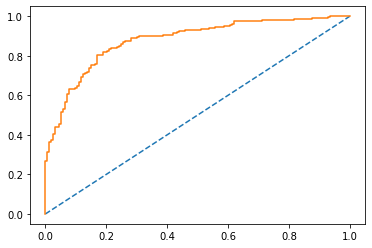

In [40]:
# predict probabilities
probs = lr_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC_test_lr: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Confusion Matrix for the training data for logistic Regression

In [41]:
confusion_matrix(y_train, lr_y_predict_train)

array([[199, 108],
       [ 68, 686]], dtype=int64)

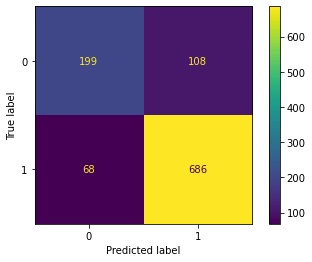

In [42]:
plot_confusion_matrix(lr_model,X_train,y_train);

In [43]:
print(classification_report(y_train, lr_y_predict_train))

              precision    recall  f1-score   support

           0       0.75      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



# Confusion Matrix for test data for logistic Regression

In [44]:
confusion_matrix(y_test, lr_y_predict_test)

array([[110,  43],
       [ 36, 267]], dtype=int64)

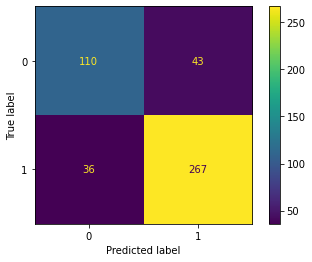

In [45]:
plot_confusion_matrix(lr_model,X_test,y_test);

In [46]:
print(classification_report(y_test, lr_y_predict_test))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



# Applying GridSearchCV for Logistic Regression

In [50]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [51]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [52]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [53]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [54]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 1e-05} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag', tol=1e-05)


In [55]:
best_model = grid_search.best_estimator_

In [56]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [57]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.424470,0.575530
1,0.151096,0.848904
2,0.007167,0.992833
3,0.834979,0.165021
4,0.069243,0.930757


              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



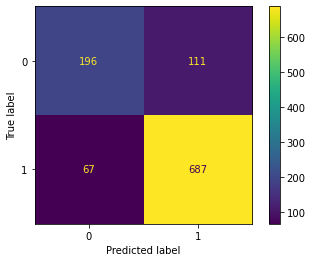

In [58]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456
 



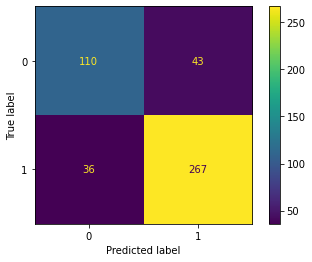

In [59]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

# AUC and ROC for the training data for logistic Regression Model after tunning. 

AUC_lr: 0.890


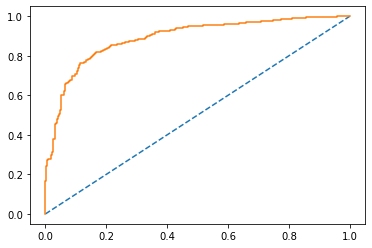

In [60]:
# predict probabilities
probs = lr_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_lr = roc_auc_score(y_train, probs)
print('AUC_lr: %.3f' % auc_lr)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# AUC and ROC for the training data for logistic Regression Model after tunning. 

AUC_test_lr: 0.878


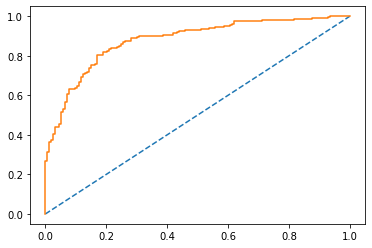

In [61]:
# predict probabilities
probs = lr_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC_test_lr: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Building LDA model

In [62]:
#Build LDA Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
LDA_model=clf.fit(X_train,y_train)

# Prediction

In [63]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = LDA_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = LDA_model.predict(X_test)

In [64]:
pred_class_train[:]

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

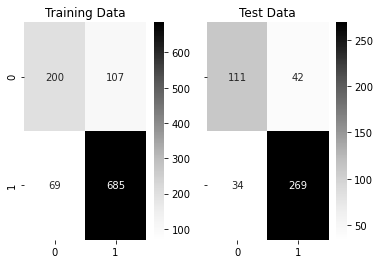

In [65]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [66]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



# Probability prediction for the training and test data

In [67]:
# Training Data Probability Prediction
pred_prob_train = LDA_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = LDA_model.predict_proba(X_test)

In [68]:

pred_prob_train[:]

array([[0.94921647, 0.05078353],
       [0.07824062, 0.92175938],
       [0.30738873, 0.69261127],
       ...,
       [0.22088844, 0.77911156],
       [0.20838927, 0.79161073],
       [0.01886825, 0.98113175]])

AUC_LDA for the Training Data: 0.889
AUC_LDA for the Test Data: 0.888


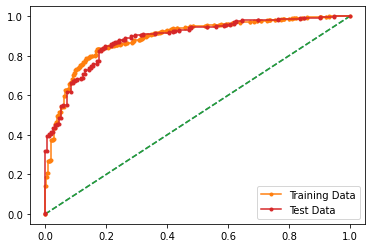

In [69]:
# AUC and ROC for the training data

# calculate AUC
auc_LDA = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC_LDA for the Training Data: %.3f' % auc_LDA)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc_LDA = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC_LDA for the Test Data: %.3f' % auc_LDA)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [70]:
LDA_model.score(X_train , y_train)

0.8341187558906692

In [71]:
LDA_model.score(X_test , y_test)

0.8333333333333334

0.1 

Accuracy Score 0.7587
F1 Score 0.8532 

Confusion Matrix


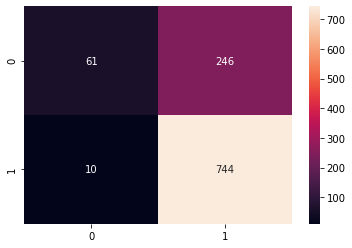

0.2 

Accuracy Score 0.7926
F1 Score 0.8689 

Confusion Matrix


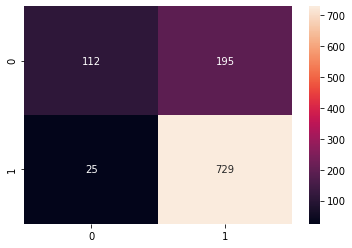

0.3 

Accuracy Score 0.8134
F1 Score 0.8787 

Confusion Matrix


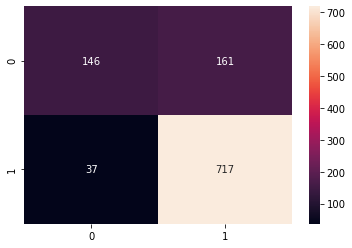

0.4 

Accuracy Score 0.8341
F1 Score 0.8897 

Confusion Matrix


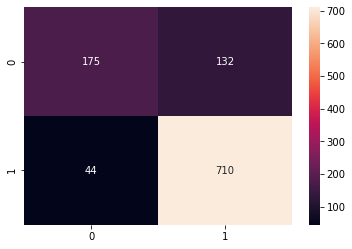

0.5 

Accuracy Score 0.8341
F1 Score 0.8862 

Confusion Matrix


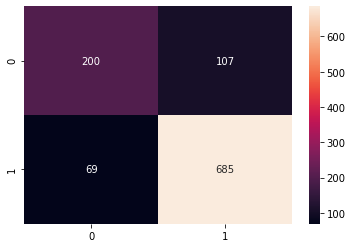

0.6 

Accuracy Score 0.8275
F1 Score 0.8781 

Confusion Matrix


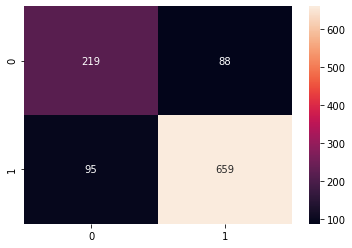

0.7 

Accuracy Score 0.8303
F1 Score 0.875 

Confusion Matrix


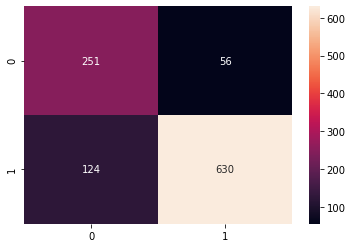

0.8 

Accuracy Score 0.7908
F1 Score 0.8363 

Confusion Matrix


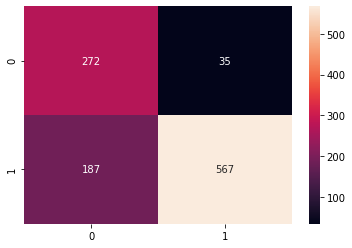

0.9 

Accuracy Score 0.6975
F1 Score 0.7384 

Confusion Matrix


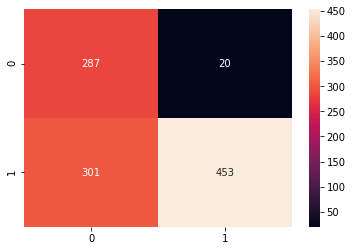

In [72]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [ ]:
#We see that 0.5 and 0.7 gives better accuracy than the rest of the custom cut-off values. But 0.4 cut-off gives us the best 'f1-score'. Here, we will take the cut-off as 0.4 to get the optimum 'f1' score.

#Let us evaluate the predictions of the test data using these cut-off values.

 

In [73]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

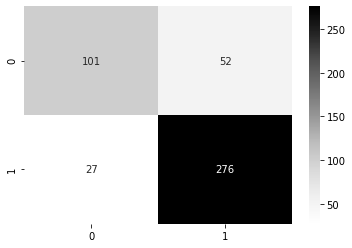

In [74]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [75]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.79      0.66      0.72       153
           1       0.84      0.91      0.87       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.82      0.83      0.82       456
 



# Building Naive Bayes Model 

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [77]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

Performance Matrix on train data set

0.8350612629594723
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



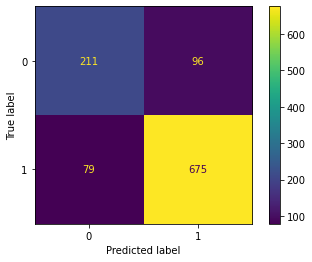

In [78]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict)) ## classification_report
plot_confusion_matrix(NB_model,X_train,y_train)

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



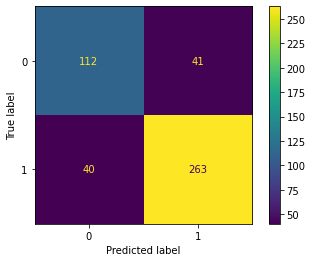

In [79]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict)) ## classification_report
plot_confusion_matrix(NB_model,X_test,y_test)

Accuracy of our Gaussian Naive Bayes model

In [80]:
NB_model.score(X_train, y_train)

0.8350612629594723

In [81]:
NB_model.score(X_test, y_test)

0.8223684210526315

AUC_NB for the Training Data: 0.888
AUC_NB for the Test Data: 0.876


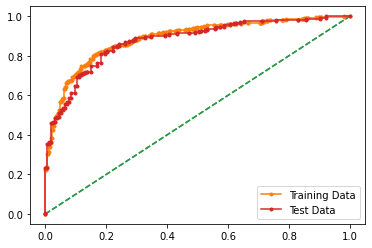

In [82]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train_NB = NB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_NB = NB_model.predict_proba(X_test)
# calculate AUC
auc_NB = metrics.roc_auc_score(y_train,pred_prob_train_NB[:,1])
print('AUC_NB for the Training Data: %.3f' % auc_NB)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_NB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc_NB = metrics.roc_auc_score(y_test,pred_prob_test_NB[:,1])
print('AUC_NB for the Test Data: %.3f' % auc_NB)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_NB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Building KNN Model 

In [126]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [127]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8529688972667295
[[204 103]
 [ 53 701]]
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       307
           1       0.87      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [128]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8157894736842105
[[ 99  54]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       153
           1       0.83      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456



In [133]:
df3 = X_test.copy()

In [135]:
df3['vote'] = y_test_predict

In [146]:
df3['vote'][df3['vote']==1]='Conservative'

In [147]:
df3

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,male,vote
504,71,3,3,2,2,8,2,0,labour
369,43,3,2,4,2,8,3,1,Conservative
1075,89,5,5,5,2,1,2,1,Conservative
1031,47,2,3,2,4,8,2,0,Conservative
1329,33,5,4,4,4,8,0,1,Conservative
...,...,...,...,...,...,...,...,...,...
562,37,4,2,4,2,8,1,1,Conservative
928,42,2,2,1,2,7,2,0,Conservative
276,88,3,3,4,1,6,0,0,Conservative
1128,53,4,3,4,2,10,0,0,Conservative


In [144]:
df3['vote'][df3['vote']==0]='labour'


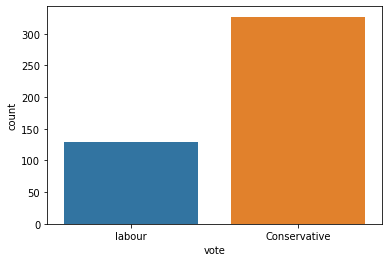

In [154]:
sns.countplot(x= 'vote' , data = df3)

In [157]:
df3['male'] = df3['Gender']

In [158]:
df3

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,male,vote,Gender
504,71,3,3,2,2,8,2,0,labour,0
369,43,3,2,4,2,8,3,1,Conservative,1
1075,89,5,5,5,2,1,2,1,Conservative,1
1031,47,2,3,2,4,8,2,0,Conservative,0
1329,33,5,4,4,4,8,0,1,Conservative,1
...,...,...,...,...,...,...,...,...,...,...
562,37,4,2,4,2,8,1,1,Conservative,1
928,42,2,2,1,2,7,2,0,Conservative,0
276,88,3,3,4,1,6,0,0,Conservative,0
1128,53,4,3,4,2,10,0,0,Conservative,0


In [160]:
df3['Gender'][df3['Gender']==1] = 'Male'

<ipython-input-160-67385cbc8006>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Gender'][df3['Gender']==1] = 'Male'


In [161]:
df3['Gender'][df3['Gender']==0] = 'Female'

<ipython-input-161-164147d5e75c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Gender'][df3['Gender']==0] = 'Female'


In [162]:
df3

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,male,vote,Gender
504,71,3,3,2,2,8,2,0,labour,Female
369,43,3,2,4,2,8,3,1,Conservative,Male
1075,89,5,5,5,2,1,2,1,Conservative,Male
1031,47,2,3,2,4,8,2,0,Conservative,Female
1329,33,5,4,4,4,8,0,1,Conservative,Male
...,...,...,...,...,...,...,...,...,...,...
562,37,4,2,4,2,8,1,1,Conservative,Male
928,42,2,2,1,2,7,2,0,Conservative,Female
276,88,3,3,4,1,6,0,0,Conservative,Female
1128,53,4,3,4,2,10,0,0,Conservative,Female


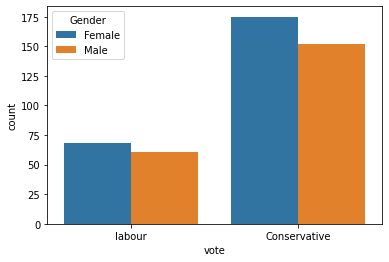

In [163]:
sns.countplot(x= 'vote' , data = df3 , hue= 'Gender')

AUC_KNN for the Training Data: 0.923
AUC_KNN for the Test Data: 0.899


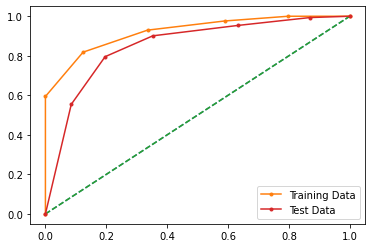

In [129]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train_KNN = KNN_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_KNN = KNN_model.predict_proba(X_test)
# calculate AUC
auc_KNN = metrics.roc_auc_score(y_train,pred_prob_train_KNN[:,1])
print('AUC_KNN for the Training Data: %.3f' % auc_KNN)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_KNN[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc_KNN = metrics.roc_auc_score(y_test,pred_prob_test_KNN[:,1])
print('AUC_KNN for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_KNN[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [86]:
# Default value n_neighbors=5, lets check the performance for K=7
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [87]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8444863336475024
[[202 105]
 [ 60 694]]
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       307
           1       0.87      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [88]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8267543859649122
[[100  53]
 [ 26 277]]
              precision    recall  f1-score   support

           0       0.79      0.65      0.72       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.78      0.80       456
weighted avg       0.82      0.83      0.82       456



In [89]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2192982456140351,
 0.21052631578947367,
 0.1842105263157895,
 0.17324561403508776,
 0.19517543859649122,
 0.19956140350877194,
 0.19956140350877194,
 0.1907894736842105,
 0.20394736842105265,
 0.19736842105263153]

Plot misclassification error vs k (with k value on X-axis) using matplotli

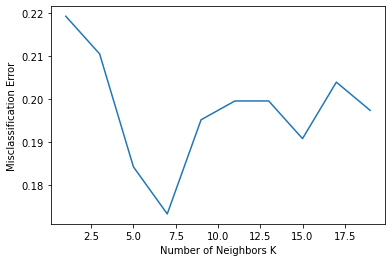

In [90]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [91]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=15)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [92]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8303487276154571
[[182 125]
 [ 55 699]]
              precision    recall  f1-score   support

           0       0.77      0.59      0.67       307
           1       0.85      0.93      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.76      0.78      1061
weighted avg       0.83      0.83      0.82      1061



In [93]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8092105263157895
[[ 95  58]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.77      0.62      0.69       153
           1       0.83      0.90      0.86       303

    accuracy                           0.81       456
   macro avg       0.80      0.76      0.77       456
weighted avg       0.81      0.81      0.80       456



In [ ]:
0.8092105263157895 - 0.8303487276154571

As the difference between train and test accuracies is less than 10%, k=5 ,it is a valid model

# Building Random Forest Model  

In [94]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [95]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [96]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[104  49]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



AUC_rf for the Training Data: 1.000
AUC_rf for the Test Data: 0.895


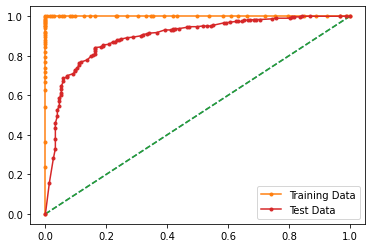

In [97]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train_RF = RF_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_RF = RF_model.predict_proba(X_test)
# calculate AUC
auc_Rf = metrics.roc_auc_score(y_train,pred_prob_train_RF[:,1])
print('AUC_rf for the Training Data: %.3f' % auc_Rf)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_RF[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc_rf = metrics.roc_auc_score(y_test,pred_prob_test_RF[:,1])
print('AUC_rf for the Test Data: %.3f' % auc_rf)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_RF[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Bagging

In [98]:
## For Linear Regression Model
from sklearn.ensemble import BaggingClassifier
Bagging_model=BaggingClassifier(base_estimator=lr_model,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

C:\Users\ARCHIT GAUTAM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ARCHIT GAUTAM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

C:\Users\ARCHIT GAUTAM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ARCHIT GAUTAM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

C:\Users\ARCHIT GAUTAM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ARCHIT GAUTAM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

C:\Users\ARCHIT GAUTAM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ARCHIT GAUTAM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  random_state=1)

In [100]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8331762488218661
[[196 111]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [101]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8289473684210527
[[110  43]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC for the Training Data: 0.890
AUC for the Test Data: 0.882


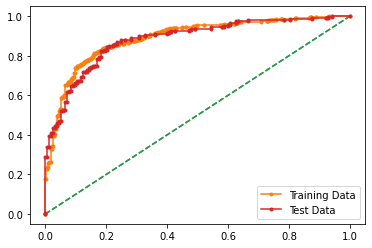

In [102]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train_BG = Bagging_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_BG = Bagging_model.predict_proba(X_test)
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train_BG[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_BG[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test_BG[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_BG[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [103]:
## For Logistic Regression Model
Bagging_model_lda=BaggingClassifier(base_estimator=LDA_model,n_estimators=100,random_state=1)
Bagging_model_lda.fit(X_train, y_train)

BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(), n_estimators=100,
                  random_state=1)

In [104]:
y_train_predict = Bagging_model_lda.predict(X_train)
model_score =Bagging_model_lda.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
[[201 106]
 [ 70 684]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.70       307
           1       0.87      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [105]:
## Performance Matrix on test data set
y_test_predict = Bagging_model_lda.predict(X_test)
model_score = Bagging_model_lda.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8333333333333334
[[111  42]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



# AUC -ROC score after tuning LDA- 

AUC for the Training Data: 0.890
AUC for the Test Data: 0.887


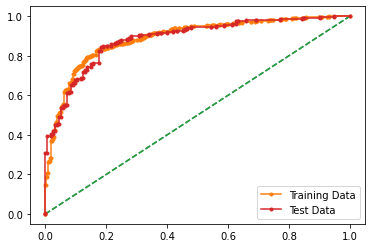

In [106]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train_BG = Bagging_model_lda.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_BG = Bagging_model_lda.predict_proba(X_test)
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train_BG[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_BG[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test_BG[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_BG[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [107]:
## For KNN  Model KNN_model
Bagging_model=BaggingClassifier(base_estimator=KNN_model,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=15),
                  n_estimators=100, random_state=1)

In [108]:
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8322337417530632
[[180 127]
 [ 51 703]]
              precision    recall  f1-score   support

           0       0.78      0.59      0.67       307
           1       0.85      0.93      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.76      0.78      1061
weighted avg       0.83      0.83      0.82      1061



In [109]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8114035087719298
[[ 95  58]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.77      0.62      0.69       153
           1       0.83      0.91      0.86       303

    accuracy                           0.81       456
   macro avg       0.80      0.76      0.78       456
weighted avg       0.81      0.81      0.81       456



In [110]:
## For Random Forest 
Bagging_model_RF=BaggingClassifier(base_estimator=RF_model,n_estimators=100,random_state=1)
Bagging_model_RF.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=100, random_state=1)

In [111]:
y_train_predict = Bagging_model_RF.predict(X_train)
model_score =Bagging_model_RF.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9679547596606974
[[277  30]
 [  4 750]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [112]:
## Performance Matrix on test data set
y_test_predict = Bagging_model_RF.predict(X_test)
model_score = Bagging_model_RF.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8289473684210527
[[104  49]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



# AUC -ROC score after tuning RF model- 

AUC for the Training Data: 0.890
AUC for the Test Data: 0.887


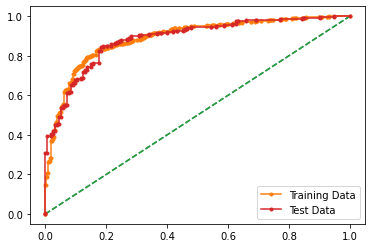

In [113]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train= Bagging_model_RF.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test= Bagging_model_RF.predict_proba(X_test)
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train_BG[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_BG[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test_BG[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_BG[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [114]:
## For Naive Bayes Model
Bagging_model_NB=BaggingClassifier(base_estimator= NB_model,n_estimators=100,random_state=1)
Bagging_model_NB.fit(X_train, y_train)

BaggingClassifier(base_estimator=GaussianNB(), n_estimators=100, random_state=1)

In [115]:
y_train_predict = Bagging_model_NB.predict(X_train)
model_score =Bagging_model_NB.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8331762488218661
[[209  98]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       307
           1       0.87      0.90      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [116]:
## Performance Matrix on test data set
y_test_predict = Bagging_model_NB.predict(X_test)
model_score = Bagging_model_NB.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[111  42]
 [ 39 264]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.86      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



# AUC -ROC score after tuning NB model- 

AUC for the Training Data: 0.888
AUC for the Test Data: 0.877


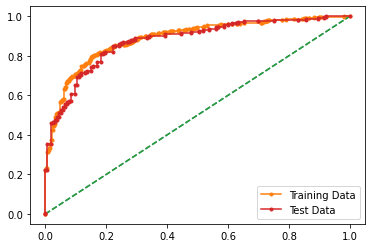

In [117]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train_BG = Bagging_model_NB.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_BG = Bagging_model_NB.predict_proba(X_test)
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train_BG[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_BG[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test_BG[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_BG[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Boosting

ADA BOOST

In [118]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [119]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [120]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



AUC for the Training Data: 0.915
AUC for the Test Data: 0.877


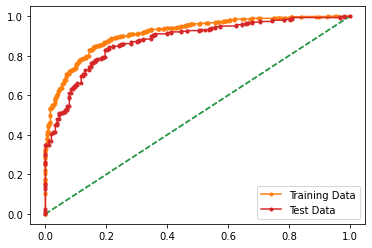

In [121]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train_ADB = ADB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_ADB = ADB_model.predict_proba(X_test)
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train_ADB[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_ADB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test_ADB[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_ADB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Gradient Boosting

In [122]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [123]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [124]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



AUC for the Training Data: 0.951
AUC for the Test Data: 0.899


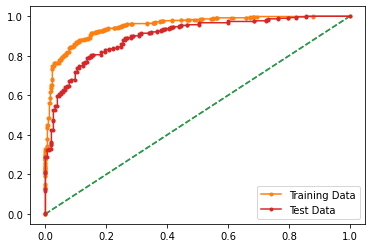

In [125]:
# AUC and ROC for the training data
# Training Data Probability Prediction
pred_prob_train_gbcl= gbcl.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_gbcl = gbcl.predict_proba(X_test)
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train_gbcl[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_gbcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test_gbcl[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_gbcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973

In [165]:
import nltk
#nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Inaugral1 = inaugural.raw('1941-Roosevelt.txt')
Inaugral2 = inaugural.raw('1961-Kennedy.txt')
Inaugral3 = inaugural.raw('1973-Nixon.txt')

# 1 . Find the number of characters, words and sentences for the mentioned documents.

In [166]:
Inaugral1 = ' '.join(str.lower(word) for word in Inaugral1.split(' '))

In [167]:
Inaugral1_Characters = len(Inaugral1)

In [168]:
Inaugral1_words = len(inaugural.words('1941-Roosevelt.txt'))

In [169]:
#nltk.download('punkt')
Inaugral1_Sents = len(inaugural.sents('1941-Roosevelt.txt'))

In [170]:
df = pd.DataFrame([['Roosevelt',Inaugral1,Inaugral1_Characters,Inaugral1_words,Inaugral1_Sents]],columns=['Narrator','speech','characters','words','sentences'])

In [171]:
df.head()

,Narrator,speech,characters,words,sentences
0,Roosevelt,on each national day of inauguration since 178...,7571,1536,68


In [172]:
Inaugral2 = ' '.join(str.lower(word) for word in Inaugral2.split(' '))

In [173]:
Inaugral2_Characters = len(Inaugral2)

In [174]:
Inaugral2_words = len(inaugural.words('1961-Kennedy.txt'))

In [175]:
Inaugral2_Sents = len(inaugural.sents('1961-Kennedy.txt'))

In [176]:
df.loc[1]=['Kennedy',Inaugral2,Inaugral2_Characters,Inaugral2_words,Inaugral1_Sents]#,columns=['Narrator','speech','characters','words','sentences']

In [177]:
df.head()

,Narrator,speech,characters,words,sentences
0,Roosevelt,on each national day of inauguration since 178...,7571,1536,68
1,Kennedy,"vice president johnson, mr. speaker, mr. chief...",7618,1546,68


In [178]:
Inaugral3 = ' '.join(str.lower(word) for word in Inaugral3.split(' '))

In [179]:
Inaugral3_Characters = len(Inaugral3)

In [180]:
Inaugral3_words = len(inaugural.words('1973-Nixon.txt'))

In [181]:
Inaugral3_Sents = len(inaugural.sents('1973-Nixon.txt'))

In [182]:
df.loc[2]=['Nixon',Inaugral3,Inaugral3_Characters,Inaugral3_words,Inaugral3_Sents]#,columns=['Narrator','speech','characters','words','sentences']

In [183]:
df.head()

,Narrator,speech,characters,words,sentences
0,Roosevelt,on each national day of inauguration since 178...,7571,1536,68
1,Kennedy,"vice president johnson, mr. speaker, mr. chief...",7618,1546,68
2,Nixon,"mr. vice president, mr. speaker, mr. chief jus...",9991,2028,69


# 2. Remove all the stopwords from all the three speeches.

In [184]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
#nltk.download('stopwords')
import string
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

In [185]:
df['stopwords'] = df['speech'].apply(lambda x: len([x for x in x.split() if x in stopwords]))

In [186]:
df.head()

,Narrator,speech,characters,words,sentences,stopwords
0,Roosevelt,on each national day of inauguration since 178...,7571,1536,68,694
1,Kennedy,"vice president johnson, mr. speaker, mr. chief...",7618,1546,68,660
2,Nixon,"mr. vice president, mr. speaker, mr. chief jus...",9991,2028,69,958


In [197]:
speech1_without_sw = " ".join([word for word in Inaugral1.split()                         
                               if word not in stopwords                             
                               if word != '--' ])

In [198]:
speech2_without_sw = " ".join([word for word in Inaugral2.split()                         
                               if word not in stopwords                             
                               if word != '--' ])

In [199]:
speech3_without_sw = " ".join([word for word in Inaugral3.split()                         
                               if word not in stopwords                             
                               if word != '--' ])

# 3. Which word occurs the most number of times in his inaugural address for each president? Mention the top three words.

In [190]:
all_cleanwords_speech1 = [word for word in speech1_without_sw.split()] 
words_freq_speech1 = nltk.FreqDist(all_cleanwords_speech1) 
words_freq_speech1.most_common() 
word_features_speech1 = [item for item in words_freq_speech1.most_common(3)] 
word_features_speech1

[('know', 9), ('us', 8), ('life', 6)]

In [191]:
all_cleanwords_speech2 = [word for word in speech2_without_sw.split()] 
words_freq_speech2 = nltk.FreqDist(all_cleanwords_speech2) 
words_freq_speech2.most_common() 
word_features_speech2 = [item for item in words_freq_speech2.most_common(3)] 
word_features_speech2

[('let', 16), ('us', 11), ('new', 7)]

In [192]:
all_cleanwords_speech3 = [word for word in speech3_without_sw.split()] 
words_freq_speech3 = nltk.FreqDist(all_cleanwords_speech3) 
words_freq_speech3.most_common() 
word_features_speech3 = [item for item in words_freq_speech3.most_common(3)] 
word_features_speech3

[('us', 25), ('let', 22), ('new', 15)]

# 4.Plot the word cloud of each of the speeches of the variable. (after removing the stopwords

In [193]:
from wordcloud import WordCloud , STOPWORDS

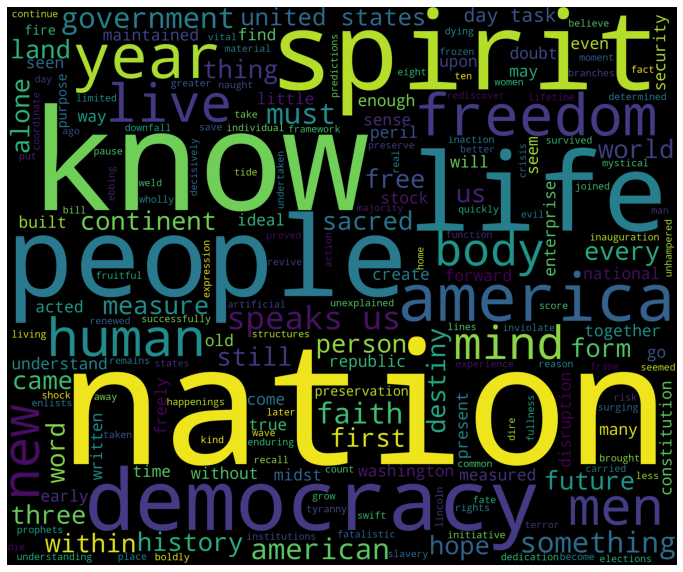

In [194]:
wordcloud_speech1 = WordCloud(stopwords=STOPWORDS,background_color='black',width=3000, height=2500 ).generate(speech1_without_sw)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_speech1) 
plt.axis('off') 
plt.show()

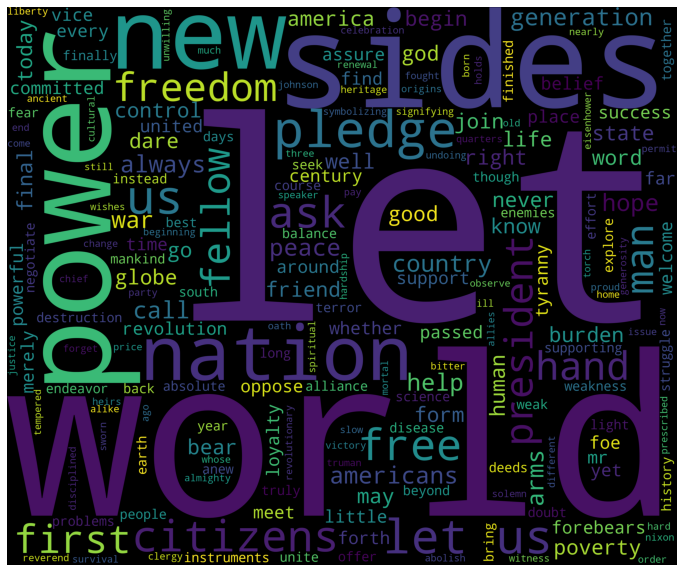

In [195]:
wordcloud_speech2 = WordCloud(stopwords=STOPWORDS,background_color='black',width=3000, height=2500 ).generate(speech2_without_sw)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_speech2) 
plt.axis('off') 
plt.show()

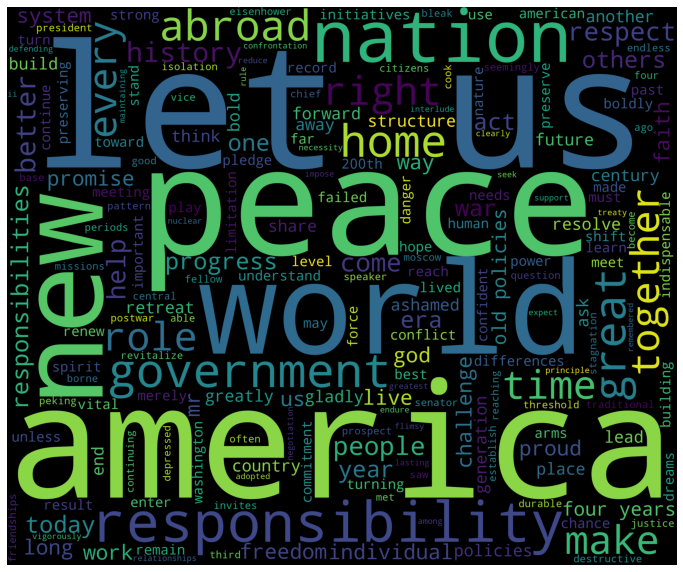

In [202]:
wordcloud_speech3 = WordCloud(stopwords=STOPWORDS,background_color='black',width=3000, height=2500 ).generate(speech3_without_sw)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_speech3) 
plt.axis('off') 
plt.show()